In [13]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl



In [8]:
x=cp.linspace(0,1,1400)
x.shape

(1400,)

In [11]:
x

array([0.00000000e+00, 7.14796283e-04, 1.42959257e-03, ...,
       9.98570407e-01, 9.99285204e-01, 1.00000000e+00])

In [9]:
y=7*cp.sin(2*cp.pi*200*x) + 5*cp.sin(2*cp.pi*400*x)+3*cp.sin(2*cp.pi*600*x)
y

array([ 0.00000000e+00,  1.16452736e+01,  2.30324170e+00, ...,
       -2.30324170e+00, -1.16452736e+01, -4.77824807e-13])

In [10]:
y.shape

(1400,)

In [19]:
from cupy.fft import fft

In [20]:
fft_y = fft(y)
print(len(fft_y))
print(fft_y[0:5])



1400
[-4.17443857e-12+0.j          9.66210986e-05-0.04305756j
  3.86508070e-04-0.08611996j  8.69732036e-04-0.12919206j
  1.54641157e-03-0.17227871j]


In [205]:
%%time
#1.6ms
#平行化: 24~55個processes

Fs = 86400.0;     # sampling rate取樣率
Ts = 1.0/Fs;    # sampling interval 取樣區間
t = cp.arange(0,1,Ts)  # time vector,這裡Ts也是步長
 
ff = 25;     # frequency of the signal
y = cp.sin(2*cp.pi*ff*t)
 
n = len(y)     # length of the signal
k = cp.arange(n)
T = n/Fs
frq = k/T     # two sides frequency range
frq1 = frq[(int(n/2))] # one side frequency range
 
YY = cp.fft.fft(y)   # 未歸一化
Y = cp.fft.fft(y)/n   # fft computing and normalization 歸一化
Y1 = Y[(int(n/2))]
 
# fig, ax = plt.subplots(4, 1)
# t = cp.asnumpy(t)
# y = cp.asnumpy(y)
# YY = cp.asnumpy(YY)
# frq = cp.asnumpy(frq)
# frq1 = cp.asnumpy(frq1)
# Y1 = cp.asnumpy(Y1)
# Y = cp.asnumpy(Y)
 
# ax[0].plot(t,y)
# ax[0].set_xlabel('Time')
# ax[0].set_ylabel('Amplitude')
 
# ax[1].plot(frq,abs(YY),'r') # plotting the spectrum
# ax[1].set_xlabel('Freq (Hz)')
# ax[1].set_ylabel('|Y(freq)|')
 
# ax[2].plot(frq,abs(Y),'G') # plotting the spectrum
# ax[2].set_xlabel('Freq (Hz)')
# ax[2].set_ylabel('|Y(freq)|')
 
# ax[3].plot(frq1,abs(Y1),'B') # plotting the spectrum
# ax[3].set_xlabel('Freq (Hz)')
# ax[3].set_ylabel('|Y(freq)|')
 
# plt.show()

CPU times: user 1.42 ms, sys: 321 µs, total: 1.74 ms
Wall time: 998 µs


In [75]:
y

array([ 0.00000000e+00,  8.66025404e-01,  8.66025404e-01,  1.22464680e-16,
       -8.66025404e-01, -8.66025404e-01, -2.44929360e-16,  8.66025404e-01,
        8.66025404e-01, -1.40896280e-15, -8.66025404e-01, -8.66025404e-01,
       -4.89858720e-16,  8.66025404e-01,  8.66025404e-01, -1.16403344e-15,
       -8.66025404e-01, -8.66025404e-01,  2.81792560e-15,  8.66025404e-01,
        8.66025404e-01, -2.69546092e-15, -8.66025404e-01, -8.66025404e-01,
       -9.79717439e-16,  8.66025404e-01,  8.66025404e-01, -2.45053156e-15,
       -8.66025404e-01, -8.66025404e-01,  2.32806688e-15,  8.66025404e-01,
        8.66025404e-01, -2.20560220e-15, -8.66025404e-01, -8.66025404e-01,
        5.63585120e-15,  8.66025404e-01,  8.66025404e-01, -1.96067284e-15,
       -8.66025404e-01, -8.66025404e-01,  5.39092184e-15,  8.66025404e-01,
        8.66025404e-01, -8.82117084e-15, -8.66025404e-01, -8.66025404e-01,
       -1.95943488e-15,  8.66025404e-01,  8.66025404e-01, -1.47081412e-15,
       -8.66025404e-01, -

In [84]:
y.shape

(86400,)

In [253]:
%%time
#6ms
 

Fs = 86400.0;     # sampling rate取樣率
Ts = 1.0/Fs;    # sampling interval 取樣區間
t = np.arange(0,1,Ts)  # time vector,這裡Ts也是步長
 
ff = 25;     # frequency of the signal
y = np.sin(2*np.pi*ff*t)
 
n = len(y)     # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T     # two sides frequency range
frq1 = frq[(int(n/2))] # one side frequency range
 
YY = np.fft.fft(y)   # 未歸一化
Y = np.fft.fft(y)/n   # fft computing and normalization 歸一化
Y1 = Y[(int(n/2))]
 
# fig, ax = plt.subplots(4, 1)
 
# ax[0].plot(t,y)
# ax[0].set_xlabel('Time')
# ax[0].set_ylabel('Amplitude')
 
# ax[1].plot(frq,abs(YY),'r') # plotting the spectrum
# ax[1].set_xlabel('Freq (Hz)')
# ax[1].set_ylabel('|Y(freq)|')
 
# ax[2].plot(frq,abs(Y),'G') # plotting the spectrum
# ax[2].set_xlabel('Freq (Hz)')
# ax[2].set_ylabel('|Y(freq)|')
 
# ax[3].plot(frq1,abs(Y1),'B') # plotting the spectrum
# ax[3].set_xlabel('Freq (Hz)')
# ax[3].set_ylabel('|Y(freq)|')
 
# plt.show()

CPU times: user 6.18 ms, sys: 144 µs, total: 6.32 ms
Wall time: 5.62 ms


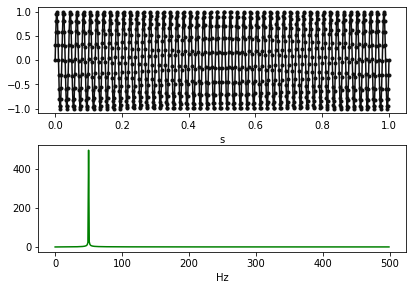

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
def GenSin(x,Hz):
     return np.sin(2*np.pi*Hz*x)
N=1000 #sampling data points: 一秒取樣幾個點，最高可以detect 頻率為N/2
dataX = np.linspace(0, 1, N) # sampling time = 1/N
dataY = np.zeros(N)
for i in range(0,N):
     dataY[i] = GenSin(dataX[i],50)

xf = np.abs(fft(dataY)) #先經過fft: 只要放Y進去，有就是0.001秒的量
plt.figure(1);
plt.subplot(211);
plt.xlabel('s')
plt.plot(dataX, dataY, marker=".", linestyle='-',color='#0F0F0F')
plt.subplot(212);
freq = np.fft.fftfreq(N, d=1/N) #再經過fftfreq，d=1/N
plt.plot(freq[0:N//2], xf[0:N//2],'g-' ); #只要看一半的地方就可以了
plt.xlabel('Hz')
plt.subplots_adjust(hspace=0.3, left=0.1, right=0.95, bottom=0.1, top=0.95)
plt.show()

In [ ]:
100